<a href="https://colab.research.google.com/github/mragungsetiaji/kaggle/blob/master/fraud_detection/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("https://storage.googleapis.com/mrdatabucket001/kaggle_credit_card_fraud_detection/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
data = df

# Credit card Fraud Detection

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Checking the target classes

Text(0, 0.5, 'Frequency')

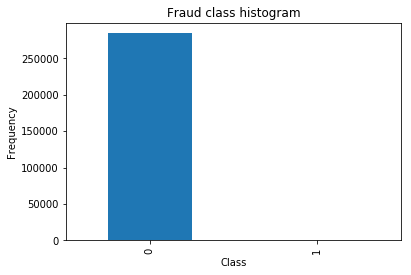

In [10]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = "bar")

plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

## Clearly the data is totally unbalanced!

This is a clear example where using a typical accuracy score to evaluate our classification algorithm. For example, if we just used a majority class to assign values to all records, we will still be having a high accuracy, BUT WE WOULD BE CLASSIFYING ALL "1'" INCORRECTLY!

There are several ways to approach this classification problem taking into consideration this unbalance,

- Collect more data? Nice strategy but not applicable in this case
- Changing the performance metric:
  - Use the confusion matrix to calculate Precision, Recall
  - F1score (weighted average of precision recall)
  - Use Kappa - which is a classification accuracy normalized by the imbalance of the classes in the data
  - ROC curves - calculates sensitivity/specificity ratio
- Resampling the dataset
  - Essentially this is a method that will process the data to have an approximate 50-50 ratio.
  - One way to achieve this is by OVER-sampling, which is adding copies of the under-represented class (better when you have little data)
  - Another is UNDER-sampling, which deletes instances from the over-represented class (better when he have lots of data)
  
## Approach
1. We are not going to perform feature engineering in first instance. The dataset has been downgraded in order to contain 30 features (28 anonamised + time + amount).
2. We will then compare what happens when using resampling and when not using it. We will test this approach using a simple logistic regression classifier.
3. We will evaluate the models by using some of the performance metrics mentioned above.
4. We will repeat the best resampling/not resampling method, by tuning the parametes in the logistic regression classifier.
5. We will finally perform classification model using other classification algorithms

## Setting our input and target variables + resampling.
1. Normalising the amount column. The amount column is not line with the anonimised features.




In [18]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))
data = data.drop(["Time", "Amount"], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


2. Assigning X and Y. No resampling.
3. Resampling.
   - As we mentioned earlier, there are several ways to resample skewed data. Apart from under and over sampling, there is a very popular approach called SMOTE (Synthetic Minority Over-Sampling Technique), which is a combination of oversampling and undersampling, but the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

   - In this notebook, we will use traditional UNDER-sampling. I will probably try to implement SMOTE in future versions of the code, but for now I will use traditional undersamplig.

   - The way we will under sample the dataset will be by creating a 50/50 ratio. This will be done by randomly selecting "x" amount of sample from the majority class, being "x" the total number of records with the minority class.

In [0]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [0]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

In [0]:
# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

In [0]:
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

In [0]:
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

In [0]:
# Under sample dataset
under_sample_data = data.iloc[under_sample_indices, :]

In [0]:
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

In [32]:
# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


## Splitting data into train and test set. Cross validation will be used when calculating accuracies.

In [34]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [35]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


## Logistic regression classifier - Undersampled data
We are very interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. If you think how Accuracy, Precision and Recall work for a confusion matrix, recall would be the most interesting:

- Accuracy = (TP+TN)/total
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)

As we know, due to the imbalacing of the data, many observations could be predicted as False Negatives, being, that we predict a normal transaction, but it is in fact a fraudulent one. Recall captures this.

- Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite.
- We could even apply a cost function when having FN and FP with different weights for each type of error, but let's leave that aside for now.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

Very ad-hoc function to print K_fold_scores

In [0]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(10, shuffle=False, random_state=5) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range), 2), 
                                 columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], 
    # test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        iteration = 0
        for train_index, test_index in fold.split(x_train_data):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l2', solver='lbfgs')

            # Use the training data to fit the model. In this case, we use 
            # the portion of the fold to train the model with indices[0]. 
            # We then predict on the portion assigned as 
            # the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[train_index,:], 
                   y_train_data.iloc[train_index,:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[test_index,:].values)

            # Calculate the recall score and append it to a list for 
            # recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[test_index,:].values,
                                      y_pred_undersample)
            recall_accs.append(recall_acc)
            iteration += 1
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to 
        # save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table['Mean recall score'].max()
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [64]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.8461538461538461
Iteration  2 : recall score =  0.7941176470588235
Iteration  3 : recall score =  0.8717948717948718
Iteration  4 : recall score =  0.8235294117647058
Iteration  5 : recall score =  0.8571428571428571
Iteration  6 : recall score =  0.9354838709677419
Iteration  7 : recall score =  0.9696969696969697
Iteration  8 : recall score =  0.8809523809523809
Iteration  9 : recall score =  0.918918918918919
Iteration  10 : recall score =  0.8214285714285714

Mean recall score  0.8719219345879688

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8974358974358975
Iteration  2 : recall score =  0.7941176470588235
Iteration  3 : recall score =  0.8974358974358975
Iteration  4 : recall score =  0.8235294117647058
Iteration  5 : recall score =  0.892857142857

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

Iteration  5 : recall score =  0.9285714285714286
Iteration  6 : recall score =  0.967741935483871
Iteration  7 : recall score =  0.9696969696969697
Iteration  8 : recall score =  0.9047619047619048
Iteration  9 : recall score =  0.918918918918919
Iteration  10 : recall score =  0.8928571428571429

Mean recall score  0.9028249657756298

*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.9028249657756298
*********************************************************************************


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Create a function to plot a fancy confusion matrix

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Predictions on test set and plotting confusion matrix

We have been talking about using the recall metric as our proxy of how effective our predictive model is. Even though recall is still the recall we want to calculate, just bear mind in mind that the undersampled data hasn't got a skewness towards a certain class, which doesn't make recall metric as critical.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.8979591836734694


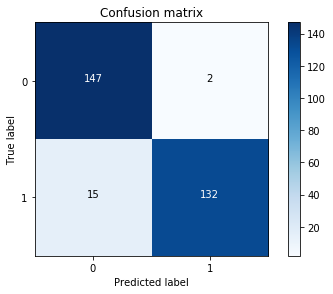

In [66]:
# Use this C_parameter to build the final model with the whole training dataset 
# and predict the classes in the test dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", 
      cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()


So, the model is offering an 93.2% recall accuracy on the generalised unseen data (test set). Not a bad percentage to be the first try. However, recall this is a 93.2% recall accuracy measure on the undersampled test set.

Being happy with this result, let's apply the model we fitted and test it on the whole data.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.9047619047619048


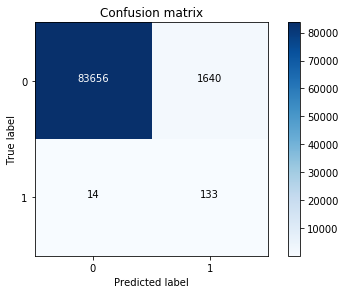

In [67]:
# Use this C_parameter to build the final model with the whole training dataset 
# and predict the classes in the test dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", 
      cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Still a very decent recall accuracy when applying it to a much larger and skewed dataset!
We can start to be happy with how initial approach is working.

## Plotting ROC curve and Precision-Recall curve.
- I find precision-recall curve much more convenient in this case as our problems relies on the "positive" class being more interesting than the negative class, but as we have calculated the recall precision, I am not going to plot the precision recall curves yet.

- AUC and ROC curve are also interesting to check if the model is also predicting as a whole correctly and not making many errors

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


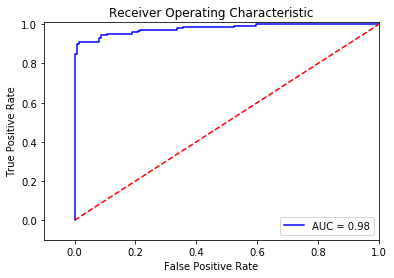

In [68]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,
                                  y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

An additional comment that would be interesting to do is to initialise multiple undersampled datasets and repeat the process in loop. Remember that, to create an undersample data, we randomly got records from the majority class. Even though this is a valid technique, is doesn't represent the real population, so it would be interesting to repeat the process with different undersample configurations and check if the previous chosen parameters are still the most effective. In the end, the idea is to use a wider random representation of the whole dataset and rely on the averaged best parameters.

## Logistic regression classifier - Skewed data
Having tested our previous approach, I find really interesting to test the same process on the skewed data. Our intuition is that skewness will introduce issues difficult to capture, and therefore, provide a less effective algorithm.

- To be fair, taking into account the fact that the train and test datasets are substantially bigger than the undersampled ones, I believe a K-fold cross validation is necessary. I guess that by splitting the data with 60% in training set, 20% cross validation and 20% test should be enough... but let's take the same approach as before (no harm on this, it's just that K-fold is computationally more expensive)

In [69]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.5277777777777778
Iteration  2 : recall score =  0.5483870967741935
Iteration  3 : recall score =  0.6111111111111112
Iteration  4 : recall score =  0.6216216216216216
Iteration  5 : recall score =  0.6551724137931034
Iteration  6 : recall score =  0.6774193548387096
Iteration  7 : recall score =  0.6923076923076923
Iteration  8 : recall score =  0.46153846153846156
Iteration  9 : recall score =  0.4888888888888889
Iteration  10 : recall score =  0.5428571428571428

Mean recall score  0.5827081561508702

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.5277777777777778
Iteration  2 : recall score =  0.5806451612903226
Iteration  3 : recall score =  0.6111111111111112
Iteration  4 : recall score =  0.6486486486486487
Iteration  5 : recall score =  0.6551724137

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.6190476190476191


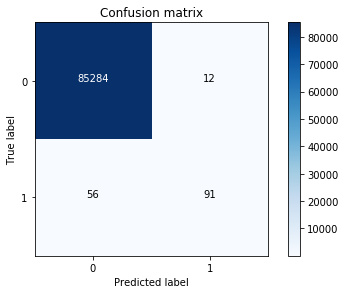

In [70]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()